In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
digits = pd.read_csv("digits.csv", header=None)

In [3]:
digits.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


# Feature explorations

In [4]:
digits.shape

(1797, 65)

In [5]:
digits.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [6]:
# distribution of classes
# bar plot

# Image Visualization

In [7]:
def _show_image(index):
    image = digits.iloc[index,:-1]
    label = digits.iloc[index,-1]

    plottable_image = np.reshape(image.values, (8, 8))

    plt.figure(figsize=(1,1))
    plt.imshow(plottable_image, cmap='gray_r')
    plt.title('Digit Label: {}'.format(label))
    plt.show()
    
def show_image_by_index(index):
    _show_image(index)
    
def show_random_image():
    index = random.randint(0, digits.shape[0])
    _show_image(index)

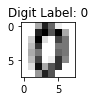

In [8]:
show_image_by_index(0)

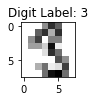

In [9]:
show_random_image()

# Fisher's LDA

###  Fisher’s Linear Discriminant Analysis (LDA) 
Fisher’s Linear Discriminant Analysis (LDA) is a dimension reduction technique that can be used for classification as well. In this blog post, we will learn more about Fisher’s LDA and implement it from scratch in Python.

### What?

As mentioned above, Fisher’s LDA is a dimension reduction technique. Such techniques can primarily be used to reduce the dimensionality for high-dimensional data. People do this for multiple reasons - dimension reduction as feature extraction, dimension reduction for classification or for data visualizaiton.

### How?

Since this is the theory section, key takeaways from it are as follows (in case, you do not want to spend time on it)
1. Calculate $(S_{b})$, $(S_{w})$ and $(d^{\prime})$ largest eigenvalues of $(S_{w}^{-1}S_{b})$.
2. Can project to a maximum of $(K - 1)$ dimensions.

The core idea is to learn a set of parameters $(w \in \mathbb{R}^{d \times d^{\prime}})$, that are used to project the given data $(x \in \mathbb{R}^{d})$ to a smaller dimension $(d^{\prime})$. The figure below (Bishop, 2006) shows an illustration. The original data is in 2 dimensions, $(d = 2)$ and we want to project it to 1 dimension, $(d = 1)$.

If we project the 2-D data points onto a line (1-D), out of all such lines, our goal is to find the one which maximizes the distance between the means of the 2 classes, after projection. If we could do that, we could achieve a good separation between the classes in 1-D. This is illustrated in the figure on the left and can be captured in the idea of maximizing the "between class covariance". However, as we can see that this causes a lot of overlap between the projected classes. We want to minimize this overlap as well. To handle this, Fisher’s LDA tries to minimize the "within-class covariance" of each class. Minimizing this covariance leads us to the projection in the figure on the right hand side, which has minimal overlap. Formalizing this, we can represent the objective as follows.

$$J(w) = \frac{w^{\mathsf{T}}S_{b}w}{w^{\mathsf{T}}S_{w}w}$$

where $(S_{b} \in \mathbb{R}^{d \times d})$ and $(S_{w} \in \mathbb{R}^{d \times d})$ are the between-class and within-class covariance matrices, respectively. They are calculated as

$$S_{b} = \sum_{k = 1}^K (m_{k} - m)N_{k}(m_{k} - m)^{\mathsf{T}}$$

$$S_{w} = \sum_{k = 1}^K \sum_{n = 1}^{N_{k}} (X_{nk} - m_{k})(X_{nk} - m_{k})^{\mathsf{T}}$$

where $(X_{nk})$ is the $(n)$th data example in the $(k)$th class, $(N_{k})$ is the number of examples in class $(k)$, $(m)$ is the overall mean of the entire data and $(m_{k})$ is the mean of the $(k)$th class. Now using Lagrangian dual and the KKT conditions, the problem of maximizing $(J)$ can be transformed into the solution

$$S_{w}^{-1}S_{b}w = \lambda w$$

which is an eigenvalue problem for the matrix $(S_{w}^{-1}S_{b})$. Thus our final solution for $(w)$ will be the eigenvectors of the above equation, corresponding to the largest eigenvalues. For reduction to $(d^{\prime})$ dimensions, we take the $(d^{\prime})$ largest eigenvalues as they will contain the most information. Also, note that if we have $(K)$ classes, the maximum value of $(d^{\prime})$ can be $(K - 1)$. That is, we cannot project $(K)$ class data to a dimension greater than $(K - 1)$. (Of course, $(d^{\prime})$ cannot be greater than the original data dimension $(d)$). This is because of the following reason. Note that the between-class scatter matrix, $(S_{b})$ was a sum of $(K)$ matrices, each of which is of rank 1, being an outer product of two vectors. Also, because the overall mean and the individual class means are related, only $(K - 1)$ of these $(K)$ matrices are independent. Thus $(S_{b})$ has a maximum rank of $(K - 1)$ and hence there are only $(K - 1)$ non-zero eigenvalues. Thus we are unable to project the data to more than $(K - 1)$ dimensions. 

In [10]:
# global variables
dimension = 2
num_of_features = digits.shape[1] - 1

### Start with whole dataset

In [11]:
# data segregation
# seed = 200
# train_test_split_ratio = 0.8

# train = digits.sample(frac=train_test_split_ratio, random_state=seed)
# test = digits.drop(train.index)

# use function to show class distribution on train and test group

# train_x = train.iloc[:,:-1]
# train_y = train.iloc[:,-1]
# test_x = test.iloc[:,:-1]
# test_y = test.iloc[:,-1]

In [12]:
train_x = digits.iloc[:,:-1]
train_y = digits.iloc[:,-1]

In [13]:
train_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [14]:
# from sklearn.preprocessing import StandardScaler

# for col in train_x.columns:
#     train_x[col] = StandardScaler().fit_transform(train_x[col].values.reshape(-1,1))

In [15]:
train_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [16]:
mu = np.mean(train_x,axis=0).values.reshape(num_of_features,1) # Mean vector mu --> Since the data has been standardized, the data means are zero 


mu_k = []

for i,orchid in enumerate(np.unique(train_y)):
    mu_k.append(np.mean(train_x.where(train_y==orchid),axis=0))
mu_k = np.array(mu_k).T

In [17]:
data_SW = []
Nc = []
for i,orchid in enumerate(np.unique(train_y)):
    a = np.array(train_x.where(train_y==orchid).dropna().values-mu_k[:,i].reshape(1,num_of_features))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(train_y==orchid))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)

In [18]:
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.pinv(SW),SB))

In [19]:
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest

In [20]:
Y = train_x.dot(w)

In [21]:
Y.shape

(1797, 2)

In [22]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

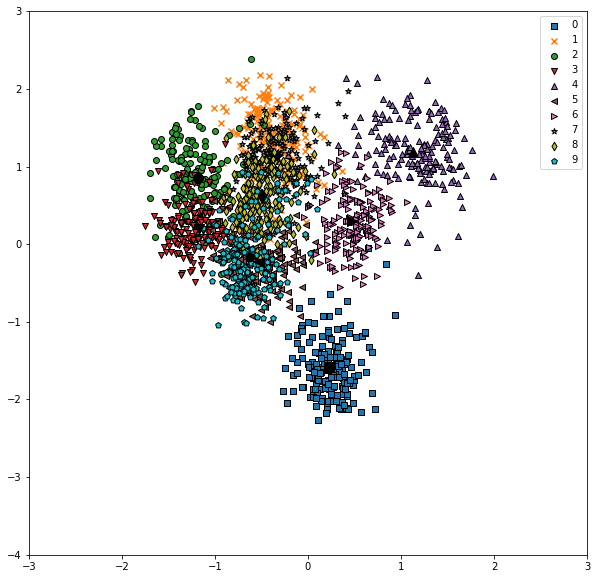

In [23]:
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

markers = ['s','x','o','v','^','<','>','*','d','p']

for l,m in zip(np.unique(train_y),markers):
    ax0.scatter(Y[0][train_y==l], Y[1][train_y==l], marker=m, label=l, edgecolors='black')
ax0.legend(loc='upper right')

# Plot the voroni spaces
means = []

for m,target in zip(markers,np.unique(train_y)):
    means.append(np.mean(Y[train_y==target],axis=0))
    ax0.scatter(np.mean(Y[train_y==target],axis=0)[0],np.mean(Y[train_y==target],axis=0)[1],marker=m,c='black',s=100)



mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []

for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))

        

#===================
# comment if we dont want to show KNearestNeighbors
# colors = ['r','g','b','c','m','y','k','pink','goldenrod','darkorange']
# NN = KNeighborsClassifier(n_neighbors=1)
# NN.fit(means,colors)        
# predictions = NN.predict(np.array(mesh))

# ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)
#===================

plt.show()

In [24]:
# from sklearn.neighbors import KNeighborsClassifier

In [25]:
# data = pd.read_csv(sys.argv[1])
# labelcol = int(sys.argv[2])
# lda = LDA(data, num_dims=2, convert_data=0, threshold=0, labelcol=labelcol)
# trainerror, testerror = lda.fit()
# print(trainerror)
# print(testerror)
# #print(verifyLDA(data, data, labelcol))
# lda.plot_proj_2D(data)
# lda.plot_bivariate_gaussians()

In [26]:
'''
Utility function to return the probability density for a gaussian, given an 
input point, gaussian mean and covariance.
'''
def pdf(point, mean, cov):
    cons = 1./((2*np.pi)**(len(point)/2.) * np.linalg.det(cov)**(-0.5))
    return cons * np.exp(-np.dot(np.dot((point-mean), np.linalg.pinv(cov)),(point-mean).T)/2.)

In [27]:
# train_x.where(train_y==1).dropna().shape
# handle dropna

In [28]:
priors = {}
gaussian_means = {}
gaussian_cov = {}
classes = []

for i, label in enumerate(np.unique(train_y)):
    classes.append(label)
    train_x_specific_class = train_x.where(train_y==label).dropna().values #.reshape(1,num_of_features))
    train_x_specific_class.shape
    proj = np.dot(w.T, train_x_specific_class.T).T
    priors[label] = train_x_specific_class.shape[0] / float(digits.shape[0])
    gaussian_means[label] = np.mean(proj, axis = 0)
    gaussian_cov[label] = np.cov(proj, rowvar=False)

In [29]:
proj = np.dot(w.T, train_x.T).T
likelihoods = np.array([[priors[c] * pdf([x[ind] for ind in range(len(x))], gaussian_means[c], gaussian_cov[c]) for c in classes] for x in proj])
output_labels = np.argmax(likelihoods, axis = 1)
errors = np.sum(output_labels != train_y)
m = errors/float(train_x.shape[0])
print(m)

0.32276015581524764
